미대출 도서 출판년도 분포:
#VALUE!          1
(昭和61)1986       1
-1973            1
0.1963           1
0.1966           1
                ..
원기101(2016)      1
주체94[2005]       2
주체97[2011] -    22
주체99(2010)       1
평성9[1997]        2
Name: 출판년도, Length: 1816, dtype: int64

미대출 도서 수서방법 비율:
수서정보없음    0.536100
사서선정      0.184562
이용자희망     0.163069
학과신청      0.101192
수업지정      0.014136
기타        0.000941
Name: 수서방법, dtype: float64

미대출 도서 주류별 분포:
역사      34421
종교      24505
철학      20316
총류      17484
언어      16906
자연과학    11882
문학       7504
예술       4279
사회과학     2978
기술과학        3
Name: 주류, dtype: int64


/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib

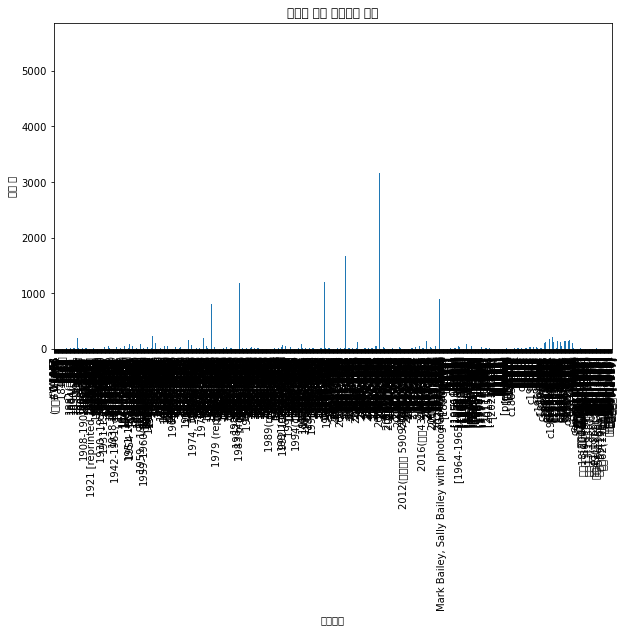

In [2]:
import pandas as pd

# 파일 경로 설정
loan_file_path = '/Users/jiwon/Desktop/데이터톤/dont_mess/대출정보.csv'
book_info_file_path = '/Users/jiwon/Desktop/데이터톤/dont_mess/단행본정보_분류코드처리.csv'

# 파일 로드
loan_data = pd.read_csv(loan_file_path, encoding="euc-kr")
book_info = pd.read_csv(book_info_file_path, encoding="euc-kr")

# 대출된 도서 ID 목록 추출
loaned_book_ids = set(loan_data['도서ID'])

# 미대출 도서 필터링
book_info['대출여부'] = book_info['도서ID'].apply(lambda x: '대출됨' if x in loaned_book_ids else '미대출')
unloaned_books = book_info[book_info['대출여부'] == '미대출']

# 미대출 도서 특성 분석
# 예: 출판년도 분포 분석
unloaned_years = unloaned_books['출판년도'].value_counts().sort_index()

# 수서방법별 비율 분석
unloaned_acquisition = unloaned_books['수서방법'].value_counts(normalize=True)

# 주류별 분석
unloaned_genre = unloaned_books['주류'].value_counts()

# 분석 결과 출력
print("미대출 도서 출판년도 분포:")
print(unloaned_years)

print("\n미대출 도서 수서방법 비율:")
print(unloaned_acquisition)

print("\n미대출 도서 주류별 분포:")
print(unloaned_genre)

# 필요한 경우 시각화
import matplotlib.pyplot as plt

# 출판년도 분포 시각화
plt.figure(figsize=(10, 6))
unloaned_years.plot(kind='bar')
plt.title('미대출 도서 출판년도 분포')
plt.xlabel('출판년도')
plt.ylabel('도서 수')
plt.show()


수서방법별 미대출 도서 분석:
        미대출 도서 수        비율  비율 (%)
수서정보없음     75203  0.536100   53.61
사서선정       25890  0.184562   18.46
이용자희망      22875  0.163069   16.31
학과신청       14195  0.101192   10.12
수업지정        1983  0.014136    1.41
기타           132  0.000941    0.09


/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib

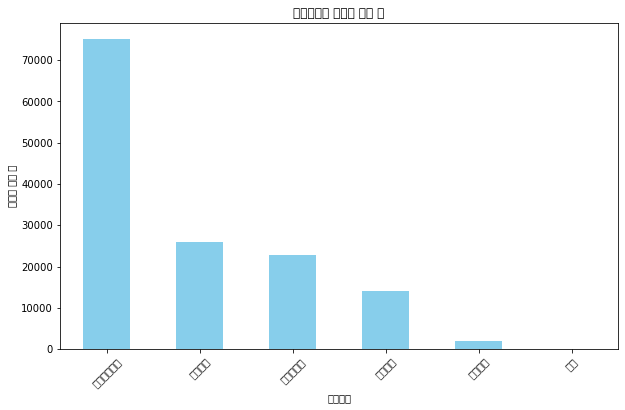

In [3]:
# 미대출 도서 수서방법별 숫자와 비율 계산
unloaned_acquisition_counts = unloaned_books['수서방법'].value_counts()
unloaned_acquisition_ratios = unloaned_books['수서방법'].value_counts(normalize=True)

# 데이터프레임으로 정리
unloaned_acquisition_analysis = pd.DataFrame({
    '미대출 도서 수': unloaned_acquisition_counts,
    '비율': unloaned_acquisition_ratios
})

# 비율을 %로 변환
unloaned_acquisition_analysis['비율 (%)'] = (unloaned_acquisition_analysis['비율'] * 100).round(2)

# 분석 결과 출력
print("수서방법별 미대출 도서 분석:")
print(unloaned_acquisition_analysis)

# 시각화 - 수서방법별 미대출 도서 수
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
unloaned_acquisition_analysis['미대출 도서 수'].plot(kind='bar', color='skyblue')
plt.title('수서방법별 미대출 도서 수')
plt.xlabel('수서방법')
plt.ylabel('미대출 도서 수')
plt.xticks(rotation=45)
plt.show()


수서방법별 미대출 비율 분석:
        전체 도서 수  미대출 도서 수  미대출 비율 (%)
수서정보없음   121595     75203       61.85
기타          279       132       47.31
학과신청      32150     14195       44.15
수업지정       4612      1983       43.00
사서선정      60378     25890       42.88
이용자희망     82137     22875       27.85


/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/matplotlib

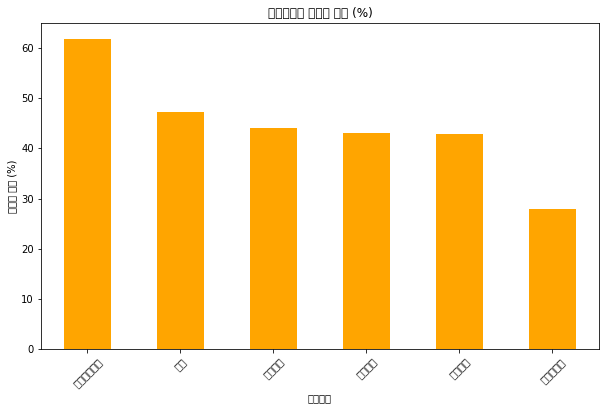

In [4]:
# 수서방법별 전체 도서 수와 미대출 도서 수 계산
total_books_per_method = book_info['수서방법'].value_counts()
unloaned_books_per_method = unloaned_books['수서방법'].value_counts()

# 미대출 비율 계산
unloaned_ratio_per_method = (unloaned_books_per_method / total_books_per_method).fillna(0)

# 데이터프레임으로 정리
analysis_df = pd.DataFrame({
    '전체 도서 수': total_books_per_method,
    '미대출 도서 수': unloaned_books_per_method,
    '미대출 비율 (%)': (unloaned_ratio_per_method * 100).round(2)
}).sort_values(by='미대출 비율 (%)', ascending=False)

# 결과 출력
print("수서방법별 미대출 비율 분석:")
print(analysis_df)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
analysis_df['미대출 비율 (%)'].plot(kind='bar', color='orange')
plt.title('수서방법별 미대출 비율 (%)')
plt.xlabel('수서방법')
plt.ylabel('미대출 비율 (%)')
plt.xticks(rotation=45)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# 대출 정보: 도서ID, 대출일자
df_loan = pd.read_csv("/Users/jiwon/Desktop/데이터톤/dont_mess/대출정보.csv", encoding="euc-kr")

# 전체 도서 정보: 도서ID, 등록일자, 수서방법, 주류, 강목, 요목, 분류코드, ISBN, 서명, 저자, 출판사, 출판년도, 소장위치
df_books = pd.read_csv("/Users/jiwon/Desktop/데이터톤/dont_mess/org+preptype+repyr+lastyr.csv")

# 대출된 도서의 ID 목록만 추출 (중복 제거)
borrowed_ids = df_loan['도서ID'].unique()

# 전체 책에서 대출된 적 없는 도서만 필터링
df_not_borrowed = df_books[~df_books['도서ID'].isin(borrowed_ids)]

print(f"한 번도 대출되지 않은 책의 수: {len(df_not_borrowed)}")


/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (7,8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


한 번도 대출되지 않은 책의 수: 140278


In [8]:
# 출판년도 기술통계
print(df_not_borrowed['출판년도'].describe())


count     140177
unique      1816
top         2018
freq        5589
Name: 출판년도, dtype: object


In [9]:
# 주류 분포
print("주류 분포:\n", df_not_borrowed['주류'].value_counts(), "\n")

# 강목 분포
print("강목 분포:\n", df_not_borrowed['강목'].value_counts(), "\n")

# 요목 분포
print("요목 분포:\n", df_not_borrowed['요목'].value_counts(), "\n")

# 분류코드 분포
print("분류코드 분포:\n", df_not_borrowed['분류코드'].value_counts(), "\n")

# 수서방법 분포
print("수서방법 분포:\n", df_not_borrowed['수서방법'].value_counts(), "\n")

# 소장위치 분포
print("소장위치 분포:\n", df_not_borrowed['소장위치'].value_counts(), "\n")


주류 분포:
 역사      34421
종교      24505
철학      20316
총류      17484
언어      16906
자연과학    11882
문학       7504
예술       4279
사회과학     2978
기술과학        3
Name: 주류, dtype: int64 

강목 분포:
 남아메리카        17974
문학            7501
일반전집,총서       7335
아시아           6715
심리학           6238
             ...  
의학               3
회화,도화,디자인        2
조각,조형미술          1
오락,스포츠           1
교육학              1
Name: 강목, Length: 68, dtype: int64 

요목 분포:
 콜롬비아        12812
심리학각론        5699
전집, 총서       4900
개인의 일반전집     4783
북아메리카        4062
            ...  
298             1
7               1
시               1
생물지리학           1
9               1
Name: 요목, Length: 456, dtype: int64 

분류코드 분포:
 81.2         4374
951.5        2971
82           2534
248.4        1880
915.1        1342
             ... 
422.4           1
27.7025         1
28.9094         1
973.55092       1
201.764         1
Name: 분류코드, Length: 9943, dtype: int64 

수서방법 분포:
 수서정보없음    75203
사서선정      25890
이용자희망     22875
학과신청      14195
수업지정  

In [9]:
df_books['대출여부'] = df_books['도서ID'].isin(df_loan['도서ID']).astype(int)
# 대출됨: 1, 대출 안 됨: 0

cross_tab = pd.crosstab(df_books['수서방법'], df_books['대출여부'])
cross_tab.columns = ['미대출','대출']  # 대출여부=0,1
print(cross_tab)


          미대출     대출
수서방법                
기타        132    147
사서선정    25890  34488
수서정보없음  75203  46392
수업지정     1983   2629
이용자희망   22875  59262
학과신청    14195  17955


In [10]:
import mpmath as mp
from decimal import Decimal
from scipy.stats import chi2

df_books['대출여부'] = df_books['도서ID'].isin(df_loan['도서ID']).astype(int)
# 대출됨: 1, 대출 안 됨: 0
dof = 5

cross_tab = pd.crosstab(df_books['수서방법'], df_books['대출여부'])
cross_tab.columns = ['미대출','대출']  # 대출여부=0,1
cross_tab['미대출비율'] = cross_tab['미대출'] / (cross_tab['미대출'] + cross_tab['대출'])
cross_tab['대출비율'] = cross_tab['대출'] / (cross_tab['미대출'] + cross_tab['대출'])

cross_tab = pd.crosstab(df_books['수서방법'], df_books['대출여부'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-square statistic: {chi2}")
# print(f"p-value: {p}")
print("Decimal 형식(지수표기):", '%.30E' % Decimal(p))
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)


Chi-square statistic: 23402.540075742418
Decimal 형식(지수표기): 0.000000000000000000000000000000E+00
Degrees of freedom: 5
Expected frequencies:
 [[  129.95992708   149.04007292]
 [28124.44615492 32253.55384508]
 [56639.70370346 64955.29629654]
 [ 2148.29814943  2463.70185057]
 [38259.92304857 43877.07695143]
 [14975.66901654 17174.33098346]]


In [7]:
import mpmath as mp

# 통계량(카이제곱값)과 자유도
chi2_stat = 23402.540075742418
dof = 5

# 계산 정밀도 설정 (원하는 만큼 키울 수 있음)
mp.mp.prec = 200

# regularized incomplete gamma 함수를 이용하여 CDF 값을 구한 뒤,
# survival function(SF) = 1 - CDF 로 p-value 계산
cdf_val = mp.gammainc(dof/2, 0, chi2_stat/2, regularized=True)
p_val_mpmath = 1 - cdf_val

print("mpmath p-value:", p_val_mpmath)


mpmath p-value: 0.0


In [12]:
cross_tab['미대출비율'] = cross_tab['미대출'] / (cross_tab['미대출'] + cross_tab['대출'])
cross_tab['대출비율'] = cross_tab['대출'] / (cross_tab['미대출'] + cross_tab['대출'])
print(cross_tab[['미대출비율','대출비율']])


           미대출비율      대출비율
수서방법                      
기타      0.473118  0.526882
사서선정    0.428799  0.571201
수서정보없음  0.618471  0.381529
수업지정    0.429965  0.570035
이용자희망   0.278498  0.721502
학과신청    0.441524  0.558476


결과 봤을 떄 이용자 희망 도서가 유의미하게 대출 비율이 높음 ! 

# 카이제곱 검정

카이 제곱 수치 : 겁나 큼
p-value 겁나 작음

그래서 통계적으로 수서 방법과 대출 여부는 관련성이 있다 ! 땅땅

In [40]:
cross_tab = pd.crosstab(df_books['수서방법'], df_books['대출여부'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)


Chi-square statistic: 23402.540075742418
p-value: 0.0
Degrees of freedom: 5
Expected frequencies:
 [[  129.95992708   149.04007292]
 [28124.44615492 32253.55384508]
 [56639.70370346 64955.29629654]
 [ 2148.29814943  2463.70185057]
 [38259.92304857 43877.07695143]
 [14975.66901654 17174.33098346]]


In [41]:
# 파일 경로 설정
loan_file_path = '/Users/jiwon/Desktop/데이터톤/dont_mess/대출정보.csv'
book_info_file_path = '/Users/jiwon/Desktop/데이터톤/dont_mess/org+preptype+repyr+lastyr.csv'

# 파일 로드
df_loan = pd.read_csv(loan_file_path, encoding="euc-kr")
df_books = pd.read_csv(book_info_file_path, encoding="utf-8")

# 2) 대출된 도서 ID 집합
borrowed_ids = df_loan['도서ID'].unique()

# 3) 대출되지 않은 도서만 필터링
df_not_borrowed = df_books[~df_books['도서ID'].isin(borrowed_ids)]
print(f"대출되지 않은 도서 수: {len(df_not_borrowed)}")


/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (7,8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


대출되지 않은 도서 수: 140278


count    138628.000000
mean       1998.674106
std          21.312275
min        1816.000000
25%        1986.000000
50%        2004.000000
75%        2016.000000
max        2025.000000
Name: 대표년도, dtype: float64
1816.0      3
1822.0      1
1823.0      1
1825.0      1
1826.0      1
         ... 
1937.0     72
1938.0    111
1939.0     79
1940.0     83
1941.0     69
Name: 대표년도, Length: 100, dtype: int64


/var/folders/3d/d0183jrx6mnbvv_258n_lzsm0000gn/T/ipykernel_61312/729889910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_borrowed['대표년도'] = pd.to_numeric(df_not_borrowed['대표년도'], errors='coerce')


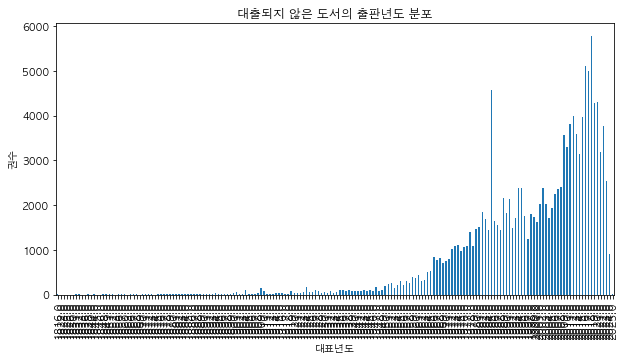

In [42]:
# 출판년도 기술통계
print(df_not_borrowed['대표년도'].describe())

# 출판년도별 책 권수 분포 (GroupBy)
df_not_borrowed['대표년도'] = pd.to_numeric(df_not_borrowed['대표년도'], errors='coerce')

year_counts = df_not_borrowed['대표년도'].value_counts().sort_index()
print(year_counts.head(100))  # 앞 몇 개만 확인

# 예시 그래프 (matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
year_counts.plot(kind='bar')
plt.title('대출되지 않은 도서의 출판년도 분포')
plt.xlabel('대표년도')
plt.ylabel('권수')
plt.show()


In [43]:
# 대표년도 -> 숫자 형 변환 (혹시 문자로 되어 있을 경우)
df_not_borrowed['대표년도'] = pd.to_numeric(df_not_borrowed['대표년도'], errors='coerce')

# 기술통계
print(df_not_borrowed['대표년도'].describe())

# 연도별 책 권수
year_counts = df_not_borrowed['대표년도'].value_counts().sort_index()
print(year_counts.head(10))  # 연도별로 얼마나 있는지 일부 확인


count    138628.000000
mean       1998.674106
std          21.312275
min        1816.000000
25%        1986.000000
50%        2004.000000
75%        2016.000000
max        2025.000000
Name: 대표년도, dtype: float64
1816.0     3
1822.0     1
1823.0     1
1825.0     1
1826.0     1
1830.0     1
1831.0    16
1832.0     2
1833.0     1
1836.0     1
Name: 대표년도, dtype: int64


/var/folders/3d/d0183jrx6mnbvv_258n_lzsm0000gn/T/ipykernel_61312/4162522388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_borrowed['대표년도'] = pd.to_numeric(df_not_borrowed['대표년도'], errors='coerce')


/var/folders/3d/d0183jrx6mnbvv_258n_lzsm0000gn/T/ipykernel_61312/2763220041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_borrowed['등록일자'] = pd.to_datetime(df_not_borrowed['등록일자'], errors='coerce')
/var/folders/3d/d0183jrx6mnbvv_258n_lzsm0000gn/T/ipykernel_61312/2763220041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_borrowed['등록연도'] = df_not_borrowed['등록일자'].dt.year
/var/folders/3d/d0183jrx6mnbvv_258n_lzsm0000gn/T/ipykernel_61312/2763220041.py:5: SettingWithCopyWarning: 
A value 

1968      114
1969      318
1970      519
1971      609
1972      454
1973      893
1974      496
1975      338
1976      400
1977      324
1978      361
1979      478
1980      313
1981      432
1982      326
1983      431
1984      362
1985      331
1986      327
1987      470
1988      224
1989      287
1990      304
1991      243
1992      316
1993      332
1994     8324
1995    24273
1996     2777
1997     5255
1998     1964
1999     1652
2000     1087
2001     1039
2002     2882
2003     1579
2004      708
2005     1228
2006     2094
2007     1199
2008     1689
2009     2202
2010     4008
2011     5062
2012     4530
2013     5873
2014     3734
2015     3860
2016     5606
2017     6124
2018     6254
2019     5016
2020     4721
2021     4061
2022     4829
2023     4286
2024     2360
Name: 등록연도, dtype: int64


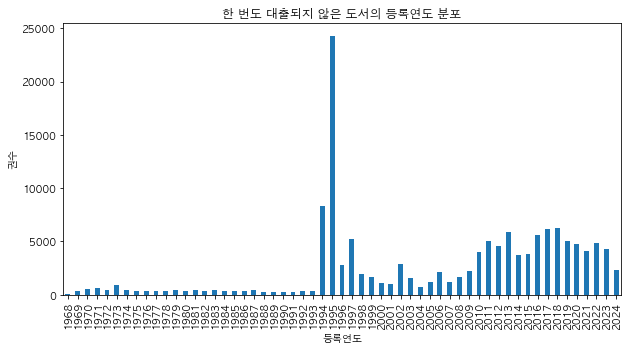

In [44]:
df_not_borrowed['등록일자'] = pd.to_datetime(df_not_borrowed['등록일자'], errors='coerce')

# 등록 연도, 등록 월 등 파생
df_not_borrowed['등록연도'] = df_not_borrowed['등록일자'].dt.year
df_not_borrowed['등록월'] = df_not_borrowed['등록일자'].dt.month

reg_year_counts = df_not_borrowed['등록연도'].value_counts().sort_index()
print(reg_year_counts)

plt.figure(figsize=(10,5))
reg_year_counts.plot(kind='bar')
plt.title('한 번도 대출되지 않은 도서의 등록연도 분포')
plt.xlabel('등록연도')
plt.ylabel('권수')
plt.show()


In [45]:
df_books['대출여부'] = df_books['도서ID'].isin(df_loan['도서ID']).astype(int)
# => 대출됨: 1, 대출 안 됨: 0

df_books['대표년도'] = pd.to_numeric(df_books['대표년도'], errors='coerce')
df_books['등록일자'] = pd.to_datetime(df_books['등록일자'], errors='coerce')
df_books['등록연도'] = df_books['등록일자'].dt.year


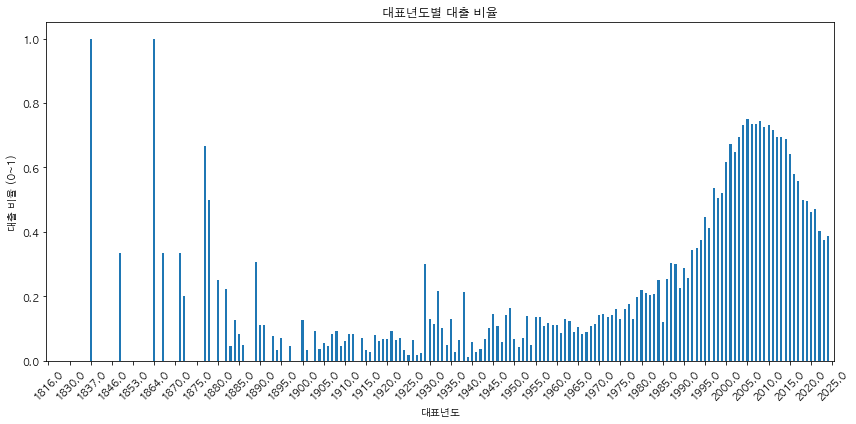

In [46]:
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 설정 (MacOS)
plt.rcParams['font.family'] = 'AppleGothic'

# 그래프에서 음수 표시가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

# 이후에 그래프 코드 실행
grouped_year = df_books.groupby('대표년도')['대출여부'].mean().sort_index()

plt.figure(figsize=(12,6))
grouped_year.plot(kind='bar')
plt.title("대표년도별 대출 비율")
plt.xlabel("대표년도")
plt.ylabel("대출 비율 (0~1)")
# x축 라벨 회전
# 예: 5년 간격으로 라벨 표시
ticks = range(0, len(grouped_year), 5)  # 0, 5, 10, 15,...
plt.xticks(ticks, grouped_year.index[ticks], rotation=45)
plt.tight_layout()
plt.show()


In [47]:
import statsmodels.api as sm

# 결측치 있는 행 제거(단순 예시)
df_model = df_books.dropna(subset=['대표년도','등록연도','대출여부']).copy()

X = df_model[['대표년도','등록연도']]
y = df_model['대출여부']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.644882
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   대출여부   No. Observations:               299301
Model:                          Logit   Df Residuals:                   299298
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                 0.06597
Time:                        20:11:24   Log-Likelihood:            -1.9301e+05
converged:                       True   LL-Null:                   -2.0665e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.4083      0.782    -72.097      0.000     -57.942     -54.875
대표년도           0.0613      0.

> 대표년도 : 0.0613
오즈비 -> 1.063정도
대표년도가 1년 증가하면 오즈가 1.063증가
10년 차이나면 대출 횟수가 1.84 높아짐

> 등록년도 : -0.033
등록년도가 1년 증가할 때 오즈가 0.968 줄어든다
10년차이면 0.72배로 감소
이건 등록된지 오래돼서 대출된 시간이 많았기 때문에 대출 기록이 있어서 그런가? 

In [48]:
import pandas as pd

# (참고) 대표년도, 등록연도 전처리
df_books['대표년도'] = pd.to_numeric(df_books['대표년도'], errors='coerce')
df_books['등록일자'] = pd.to_datetime(df_books['등록일자'], errors='coerce')
df_books['등록연도'] = df_books['등록일자'].dt.year

# 대출여부(0/1)
df_books['대출여부'] = df_books['도서ID'].isin(df_loan['도서ID']).astype(int)

# 대표년도와 등록연도 차이
df_books['year_diff'] = df_books['등록연도'] - df_books['대표년도']


In [49]:
df_books['diff_abs'] = df_books['year_diff'].abs()
df_five_diff = df_books[df_books['diff_abs'] >= 5]
df_ten_diff = df_books[df_books['diff_abs'] >= 10]
df_twenty_diff = df_books[df_books['diff_abs'] >= 20]
df_fifty_diff = df_books[df_books['diff_abs'] >= 50]
df_hundred_diff = df_books[df_books['diff_abs'] >= 100]

print(f"대표년도와 등록연도 차이가 5년 이상인 도서 수: {len(df_five_diff)}")
print(f"대표년도와 등록연도 차이가 10년 이상인 도서 수: {len(df_ten_diff)}")
print(f"대표년도와 등록연도 차이가 30년 이상인 도서 수: {len(df_twenty_diff)}")
print(f"대표년도와 등록연도 차이가 50년 이상인 도서 수: {len(df_fifty_diff)}")
print(f"대표년도와 등록연도 차이가 100년 이상인 도서 수: {len(df_hundred_diff)}")


대표년도와 등록연도 차이가 5년 이상인 도서 수: 74038
대표년도와 등록연도 차이가 10년 이상인 도서 수: 47024
대표년도와 등록연도 차이가 30년 이상인 도서 수: 19626
대표년도와 등록연도 차이가 50년 이상인 도서 수: 3220
대표년도와 등록연도 차이가 100년 이상인 도서 수: 335


In [50]:
import numpy as np

# 구간 설정: 예시로 -10보다 작은 경우, -10~-5, -5~0, 0~5, 5~10, 10 초과
bins = [-np.inf, -10, -5, 0, 5, 10, 30, 50, 100, np.inf]
labels = ["< -10", "-10 ~ -5", "-5 ~ 0", "0 ~ 5", "5 ~ 10", "10 ~ 30",  "30 ~ 50",  "50 ~ 100", "100 > " ]

df_books['diff_bin'] = pd.cut(df_books['year_diff'], bins=bins, labels=labels)

# 구간별 대출여부 (카운트/비율)
crosstab = pd.crosstab(df_books['diff_bin'], df_books['대출여부'])
crosstab.columns = ['미대출','대출'] 
crosstab['대출비율'] = crosstab['대출'] / (crosstab['미대출'] + crosstab['대출'])
print(crosstab)


            미대출     대출      대출비율
diff_bin                        
< -10        83     35  0.296610
-10 ~ -5     88     82  0.482353
-5 ~ 0    48024  83204  0.634042
0 ~ 5     44548  56901  0.560883
5 ~ 10    12400  10345  0.454825
10 ~ 30   25400   9077  0.263277
30 ~ 50    5226    754  0.126087
50 ~ 100   2575    238  0.084607
100 >       284     37  0.115265


In [51]:
import statsmodels.api as sm

df_model = df_books.dropna(subset=['대표년도','등록연도','year_diff','대출여부']).copy()

# 독립변수에 year_diff만 써도 되고, 다른 변수(대표년도, 등록연도)도 포함 가능
X = df_model[['year_diff']]
y = df_model['대출여부']

X = sm.add_constant(X)  # 상수항
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.653910
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   대출여부   No. Observations:               299301
Model:                          Logit   Df Residuals:                   299299
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                 0.05290
Time:                        20:11:26   Log-Likelihood:            -1.9572e+05
converged:                       True   LL-Null:                   -2.0665e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4425      0.004    102.936      0.000       0.434       0.451
year_diff     -0.0729      0.

> R^2이 크지는 않지만 귀무모형보다는 향상을 보이기는 함 (psuedo r-squared = 0.05290)

> LLR p-value 거의 0, 통계적으로 유의미!



year_diff가 클 수록 대출될 확률이 감소한다. 고로 최신 책을 들여오는게 좋겠다. 

### year_diff=0인 경우, 대출 확률은 약 60% (최대한 최신 년도 책을 들고오자 .. )


   year_diff   logit  predicted_prob
0          0  0.4425        0.608855
1          1  0.3696        0.591362
2          2  0.2967        0.573636
3          3  0.2238        0.555718
4          4  0.1509        0.537654
5          5  0.0780        0.519490
6          6  0.0051        0.501275
7          7 -0.0678        0.483056
8          8 -0.1407        0.464883
9          9 -0.2136        0.446802
...
     year_diff    logit  predicted_prob
140        140  -9.7635        0.000058
141        141  -9.8364        0.000053
142        142  -9.9093        0.000050
143        143  -9.9822        0.000046
144        144 -10.0551        0.000043
145        145 -10.1280        0.000040
146        146 -10.2009        0.000037
147        147 -10.2738        0.000035
148        148 -10.3467        0.000032
149        149 -10.4196        0.000030


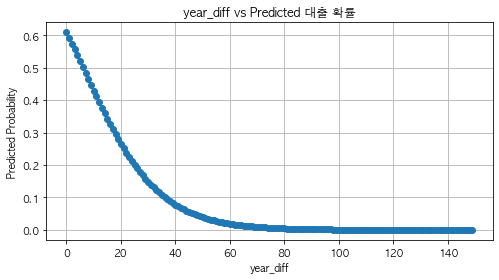

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 회귀 계수 (예시: const=0.4425, year_diff_coef=-0.0729)
const = 0.4425
year_diff_coef = -0.0729

# year_diff가 0부터 100까지
year_diffs = np.arange(150)  # [0, 1, 2, ..., 100]

# 로그오즈(logit) = const + year_diff_coef * year_diff
logits = const + year_diff_coef * year_diffs

# 대출 확률 p = 1 / (1 + exp(-logit))
pred_probs = 1 / (1 + np.exp(-logits))

# 데이터프레임으로 정리
df_pred = pd.DataFrame({
    'year_diff': year_diffs,
    'logit': logits,
    'predicted_prob': pred_probs
})

print(df_pred.head(10))
print("...")
print(df_pred.tail(10))

# 간단히 그래프로 확인
plt.figure(figsize=(8,4))
plt.plot(df_pred['year_diff'], df_pred['predicted_prob'], marker='o')
plt.title("year_diff vs Predicted 대출 확률")
plt.xlabel("year_diff")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()


In [13]:
import pandas as pd
import numpy as np

# 파일 경로(사용자 환경에 맞게 설정)
loan_file_path = "/Users/jiwon/Desktop/데이터톤/dont_mess/대출정보.csv"
book_info_file_path = "/Users/jiwon/Desktop/데이터톤/dont_mess/org+preptype+repyr+lastyr.csv"

# 1) CSV 불러오기
loan_data = pd.read_csv(loan_file_path, encoding="euc-kr")
book_info = pd.read_csv(book_info_file_path, encoding="utf-8")

# loan_data 컬럼: [도서ID, 대출일시, ...]
# book_info 컬럼: [도서ID, 수서방법, 대표년도, 등록년도, ...]

# 2) 대출된 도서ID 목록
borrowed_ids = loan_data['도서ID'].dropna().unique()

# 3) 대출여부(0/1) 생성
book_info['대출여부'] = book_info['도서ID'].isin(borrowed_ids).astype(int)

# 4) "등록일자" → datetime 변환
#    등록일자가 'yyyy/mm/dd' 형식이라고 가정
book_info['등록일자'] = pd.to_datetime(book_info['등록일자'], format='%Y/%m/%d', errors='coerce')

# 5) "대표년도"를 숫자형으로 변환 (문자면 to_numeric)
book_info['대표년도'] = pd.to_numeric(book_info['대표년도'], errors='coerce')

# 6) "등록년도" 파생 (등록일자에서 연도만 추출)
book_info['등록년도'] = book_info['등록일자'].dt.year

# 7) year_diff = 등록년도 - 대표년도
book_info['year_diff'] = book_info['등록년도'] - book_info['대표년도']

print(book_info[['도서ID', '수서방법', '대표년도', '등록일자', '등록년도', 'year_diff', '대출여부']].head())

/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (7,8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


        도서ID    수서방법    대표년도       등록일자  등록년도  year_diff  대출여부
0  SS_143820  수서정보없음  1978.0 1977-02-02  1977       -1.0     0
1  SS_026726  수서정보없음  1991.0 2008-05-02  2008       17.0     0
2  SS_000298  수서정보없음  1983.0 1983-05-03  1983        0.0     0
3  SS_198515  수서정보없음  1997.0 1996-01-31  1996       -1.0     0
4  SS_213990  수서정보없음  1983.0 1994-10-31  1994       11.0     0


In [16]:
# year_diff를 구간화 예시: -∞~0, 0~5, 5~10, 10~20, 20~30, 30~∞
bins = [-np.inf, -10, -5, 0, 5, 10, 30, 50, 100, np.inf]
labels = ["< -10", "-10 ~ -5", "-5 ~ 0", "0 ~ 5", "5 ~ 10", "10 ~ 30",  "30 ~ 50",  "50 ~ 100", "100 > " ]

book_info['diff_bin'] = pd.cut(book_info['year_diff'], bins=bins, labels=labels)

crosstab = pd.crosstab(
    [book_info['diff_bin'], book_info['수서방법']],
    book_info['대출여부']
)
crosstab.columns = ['미대출','대출']
crosstab['대출비율'] = crosstab['대출'] / (crosstab['미대출'] + crosstab['대출'])

print(crosstab)

                   미대출     대출      대출비율
diff_bin 수서방법                          
< -10    수서정보없음     83     33  0.284483
         이용자희망       0      2  1.000000
-10 ~ -5 수서정보없음     88     79  0.473054
         이용자희망       0      2  1.000000
         학과신청        0      1  1.000000
-5 ~ 0   기타         60     77  0.562044
         사서선정    16898  23111  0.577645
         수서정보없음  15021  20368  0.575546
         수업지정      119    316  0.726437
         이용자희망   11524  33084  0.741661
         학과신청     4402   6248  0.586667
0 ~ 5    기타         55     50  0.476190
         사서선정     8371  10604  0.558841
         수서정보없음  21665  17754  0.450392
         수업지정      739   1290  0.635781
         이용자희망    7390  19572  0.725911
         학과신청     6328   7631  0.546672
5 ~ 10   기타         12     11  0.478261
         사서선정      283    435  0.605850
         수서정보없음   8029   3342  0.293906
         수업지정      492    538  0.522330
         이용자희망    2052   4000  0.660939
         학과신청     1532   2019  0.568572


In [17]:
import statsmodels.api as sm

# 1) 더미(One-Hot Encoding) 생성
#    drop_first=True 로 baseline(첫 범주)를 생략
df_model = pd.get_dummies(book_info, columns=['수서방법'], drop_first=True)

# 생성된 컬럼 예시: 수서방법_구입, 수서방법_기증, ... 
# baseline으로 처리된 수서방법은 해당 더미들이 전부 0인 상태.

# 2) 사용할 피처 선택
feature_cols = ['year_diff'] + [col for col in df_model.columns if col.startswith('수서방법_')]
target_col = '대출여부'

# 3) 결측치 처리 (단순 예시)
df_model = df_model.dropna(subset=feature_cols + [target_col]).copy()

# 4) 독립변수(X), 종속변수(y)
X = df_model[feature_cols]
y = df_model[target_col]

# 5) 상수항 추가
X = sm.add_constant(X)

# 6) 로지스틱 회귀 적합
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.629979
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   대출여부   No. Observations:               299301
Model:                          Logit   Df Residuals:                   299294
Method:                           MLE   Df Model:                            6
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                 0.08756
Time:                        01:19:06   Log-Likelihood:            -1.8855e+05
converged:                       True   LL-Null:                   -2.0665e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2417      0.121      1.998      0.046       0.005       0.479
year_diff      -0.0605    